In [38]:
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
# Download data
# !wget -O ChurnData.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv

--2024-01-13 10:04:57--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35943 (35K) [text/csv]
Saving to: ‘ChurnData.csv’

ChurnData.csv       100%[===================>]  35,10K  --.-KB/s    in 0,001s  

2024-01-13 10:05:00 (36,3 MB/s) - ‘ChurnData.csv’ saved [35943/35943]



- LogisticRegression
- confusion_matrix
- https://en.wikipedia.org/wiki/Logistic_function
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [50]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [51]:
churn_df.shape

(200, 28)

In [41]:
churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [42]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [43]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [44]:
churn_df.shape

(200, 10)

In [45]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [46]:
y = np.asarray(churn_df['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

In [48]:
# Normalize the data
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.14, -0.63, -0.46,  0.48,  1.7 , -0.58, -0.86],
       [-0.12, -0.63,  0.03, -0.33, -0.64, -1.14, -0.86],
       [-0.58, -0.86, -0.26, -0.35, -1.42, -0.92, -0.86],
       [ 0.12, -0.47, -0.66,  0.01, -0.64, -0.03,  1.16],
       [-1.32, -0.47,  0.23,  0.04, -0.64,  0.53, -0.86]])

In [49]:
# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=10)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


# Model

In [52]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver="liblinear").fit(X_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [53]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [55]:
# probabilities of predictions
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:5]

array([[0.42, 0.58],
       [0.72, 0.28],
       [0.65, 0.35],
       [0.51, 0.49],
       [0.5 , 0.5 ]])

# Evaluation

In [56]:
# jaccard index
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label=0)

0.7058823529411765

In [57]:
# F1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        26
           1       0.75      0.43      0.55        14

    accuracy                           0.75        40
   macro avg       0.75      0.68      0.69        40
weighted avg       0.75      0.75      0.73        40



In [58]:
# Log loss
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5817876037226268

In [88]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cnf_matrix = confusion_matrix(y_test, yhat)
# cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])

In [89]:
cnf_matrix

array([[24,  2],
       [ 8,  6]])

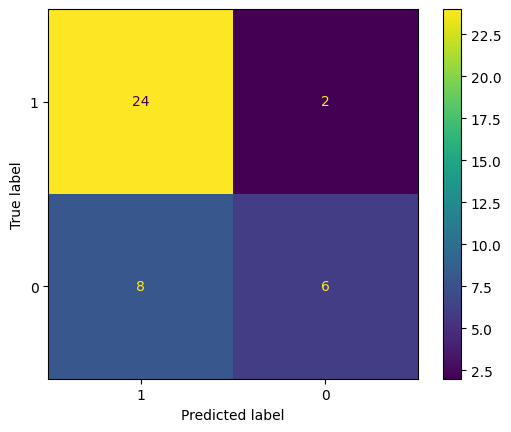

In [90]:
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=[1,0])
# disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=LR.classes_)
disp.plot()

# Model with different solver

In [65]:
LR2 = LogisticRegression(C=0.01, solver="sag").fit(X_train, y_train)
yhat2 = LR2.predict(X_test)
yhat_prob2 = LR2.predict_proba(X_test)

In [66]:
# f1 score for new model
print(classification_report(y_test, yhat2))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        26
           1       0.00      0.00      0.00        14

    accuracy                           0.65        40
   macro avg       0.33      0.50      0.39        40
weighted avg       0.42      0.65      0.51        40



/home/varfo/Projects/data-science/.conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/varfo/Projects/data-science/.conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/varfo/Projects/data-science/.conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [60]:
# log loss for new model
log_loss(y_test, yhat_prob2)

0.5744491618468478

In [67]:
# jaccard index for new model
jaccard_score(y_test, yhat2, pos_label=0)

0.65

# NOTES
- How to use GridSearchCV for best parameters in LogisticRegression()
- Robust Scaler for preprocessing 

# Exercise
Write custom script for plotting confusion matrix

Confusion matrix, without normalization
[[24  2]
 [ 8  6]]
Normalized confusion matrix
[[0.92 0.08]
 [0.57 0.43]]


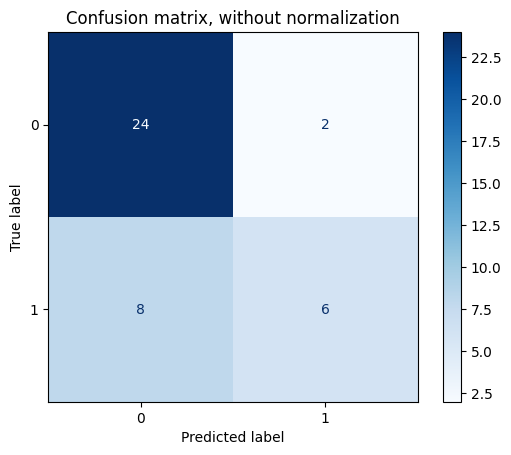

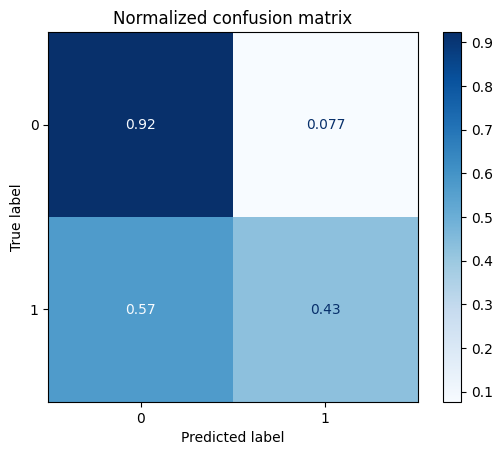

In [96]:
# Aslıhan's example

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        LR,
        X_test,
        y_test,
        display_labels=[0,1],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

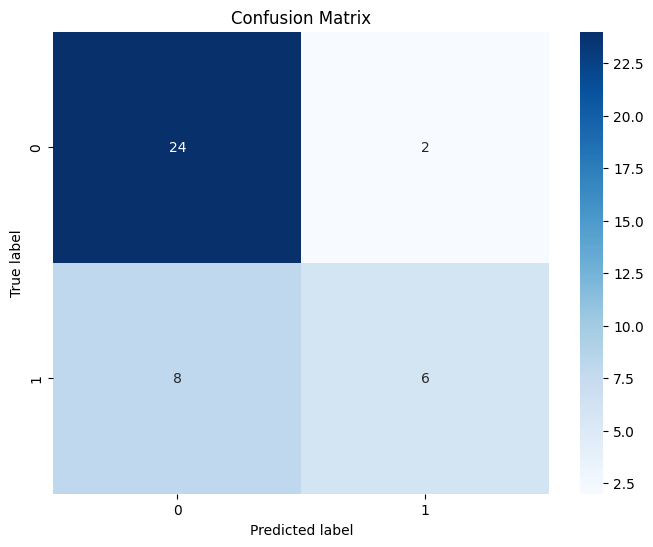

In [95]:
# Yasemin's example
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.show()